# Students Performance in Exams

- Context</br>
Marks secured by the students


- Content</br>
This data set consists of the marks secured by the students in various subjects.


- Inspiration</br>
To understand the influence of the parents background, test preparation etc on students performance

## Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
os.listdir("../Student Performance/dataset")

['StudentsPerformance.csv']

In [3]:
filename = "../Student Performance/dataset/StudentsPerformance.csv"
data = pd.read_csv(filename)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


The independent variables are follow:

- gender : sex of students
- race/ethnicity : ethnicity of students
- parental level of education : parents' final education
- lunch : having lunch before test (normal or abnormal)
- test preparation course : complete or not complete before test

## Understanding The Data

In [4]:
# rename some feature to make it simpler
data = data.rename(columns={"race/ethnicity":"ethnicity", 
                            "parental level of education":"parent_edu", 
                            "test preparation course": "preparation", 
                            "math score": "math", 
                            "reading score": "reading", 
                            "writing score": "writing"})
data.head()

,gender,ethnicity,parent_edu,lunch,preparation,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# show the size of data
print(f"Student data size: {data.shape}")

Student data size: (1000, 8)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       1000 non-null   object
 1   ethnicity    1000 non-null   object
 2   parent_edu   1000 non-null   object
 3   lunch        1000 non-null   object
 4   preparation  1000 non-null   object
 5   math         1000 non-null   int64 
 6   reading      1000 non-null   int64 
 7   writing      1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# show student data's statistic descriptive
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


## Fix Some Feature

In [8]:
# create dataframe that contain feature value's information
features = []
for dt in data.columns:
    features.append([dt, data[dt].dtype, data[dt].nunique(), data[dt].drop_duplicates().values])
display(
        pd.DataFrame(features, columns = ['Features', 'Dtypes', 'Unique Count', 'Unique Values'])
        .style
        .set_caption("Check All Columns")
        .format(precision=0)
        .hide_index()
       )

Features,Dtypes,Unique Count,Unique Values
gender,object,2,['female' 'male']
ethnicity,object,5,['group B' 'group C' 'group A' 'group D' 'group E']
parent_edu,object,6,"[""bachelor's degree"" 'some college' ""master's degree"" ""associate's degree"" 'high school' 'some high school']"
lunch,object,2,['standard' 'free/reduced']
preparation,object,2,['none' 'completed']
math,int64,81,[ 72 69 90 47 76 71 88 40 64 38 58 65 78 50 18 46 54 66 44 74 73 67 70 62 63 56 97 81 75 57 55 53 59 82 77 33 52 0 79 39 45 60 61 41 49 30 80 42 27 43 68 85 98 87 51 99 84 91 83 89 22 100 96 94 48 35 34 86 92 37 28 24 26 95 36 29 32 93 19 23 8]
reading,int64,72,[ 72 90 95 57 78 83 43 64 60 54 52 81 53 75 89 32 42 58 69 73 71 74 70 65 87 56 61 84 55 44 41 85 59 17 39 80 37 63 51 49 26 68 45 47 86 34 79 66 67 91 100 76 77 82 92 93 62 88 50 28 48 46 23 38 94 97 99 31 96 24 29 40]
writing,int64,77,[ 74 88 93 44 75 78 92 39 67 50 52 43 73 70 58 86 28 46 61 63 53 80 72 55 65 38 82 79 83 59 57 54 68 66 62 76 48 42 87 49 10 34 71 37 56 41 22 81 45 36 89 47 90 100 64 98 51 40 84 69 33 60 85 91 77 27 94 95 19 35 32 96 97 99 15 30 23]


There is no information to be taken from ethnicity, let's drop that feature

In [9]:
# drop ethnicity
data.drop(columns="ethnicity", axis=1, inplace=True)

In parent_edu, 'high school' has the same meaning as 'some high school'.
And there is 'some college' value, we don't know which degree is that. We can treat it as unknown degree. 
Let's fix those problems

In [10]:
data["parent_edu"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parent_edu, dtype: int64

In [11]:
# change similar value to the one of the value
data["parent_edu"] = data["parent_edu"].str.replace("some high school", "high school")
data["parent_edu"] = data["parent_edu"].str.replace("some college", "unknown degree")
data["parent_edu"].unique()

array(["bachelor's degree", 'unknown degree', "master's degree",
       "associate's degree", 'high school'], dtype=object)

In [12]:
# create average score feature based from each score
data["average"] = (data["math"]+data["reading"]+data["writing"])/3
data["average"] = data["average"].apply(np.round)
data.head()

,gender,parent_edu,lunch,preparation,math,reading,writing,average
0,female,bachelor's degree,standard,none,72,72,74,73.0
1,female,unknown degree,standard,completed,69,90,88,82.0
2,female,master's degree,standard,none,90,95,93,93.0
3,male,associate's degree,free/reduced,none,47,57,44,49.0
4,male,unknown degree,standard,none,76,78,75,76.0


## Missing Value

In [13]:
data.isnull().sum().any()

False

There is no missing value. We can go straight to EDA

## EDA

In [14]:
data.dtypes

gender          object
parent_edu      object
lunch           object
preparation     object
math             int64
reading          int64
writing          int64
average        float64
dtype: object

In [15]:
# split data numeric and categoric
data_cat = data.select_dtypes(include='object')
data_num = data.select_dtypes(include=['int64', 'float64'])

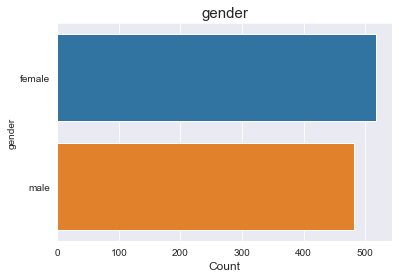

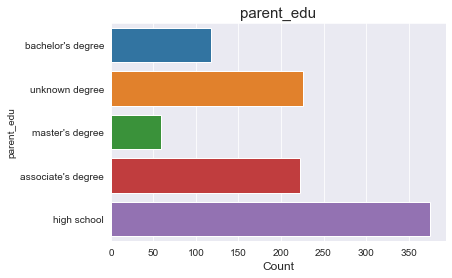

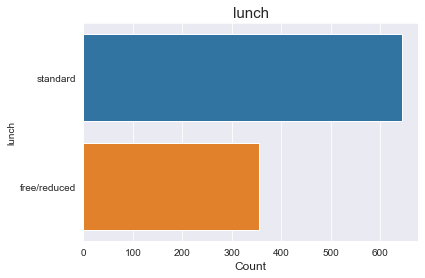

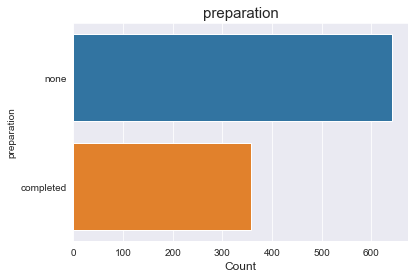

In [16]:
# categoric data
for cat in data_cat.columns:
    sns.countplot(data=data_cat, y=cat)
    plt.title(cat, fontsize=15)
#     plt.xlabel(cat, fontsize=15)
    plt.xlabel("Count", fontsize=12)
    plt.show()

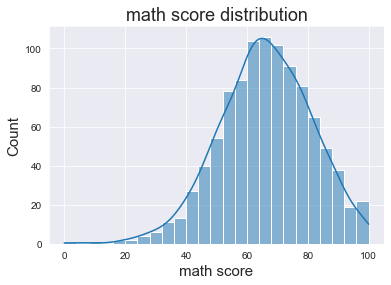

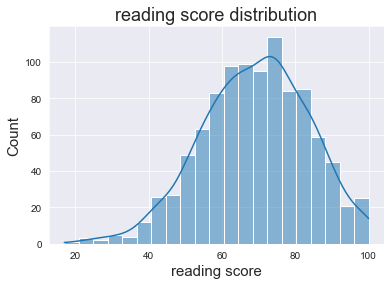

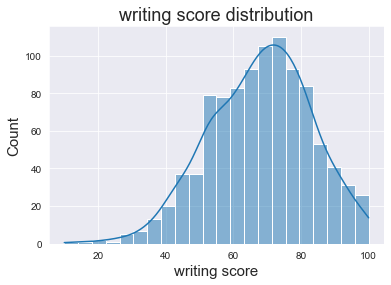

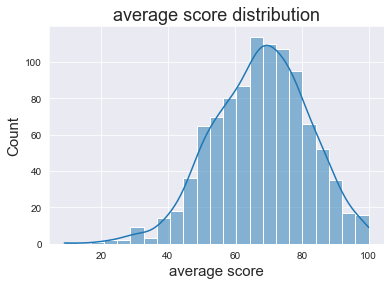

In [17]:
# numeric data distribution
for num in data_num.columns:
    sns.histplot(data=data_num, x=num, kde=True)
    plt.title(f"{num} score distribution", fontsize=18)
    plt.xlabel(f"{num} score", fontsize=15)
    plt.ylabel("Count", fontsize=15)
    plt.show()

The distribution of score's data are nearly same for all four scores
So, the data's mean, quantiles, and std are nearly same

In [28]:
""" Pivot """
print(np.round(data.pivot_table(index='gender', values=['math', 'reading','writing', 'average']), 2))
print("="*70)
print(np.round(data.pivot_table(index='parent_edu', values=['math', 'reading','writing', 'average']), 2))
print("="*70)
print(np.round(data.pivot_table(index='lunch', values=['math', 'reading','writing', 'average']), 2))
print("="*70)
print(np.round(data.pivot_table(index='preparation', values=['math', 'reading','writing', 'average']), 2))

        average   math  reading  writing
gender                                  
female    69.57  63.63    72.61    72.47
male      65.82  68.73    65.47    63.31
                    average   math  reading  writing
parent_edu                                          
associate's degree    69.56  67.88    70.93    69.90
bachelor's degree     71.95  69.39    73.00    73.38
high school           64.05  62.79    65.77    63.61
master's degree       73.58  69.75    75.37    75.68
unknown degree        68.45  67.13    69.46    68.84
              average   math  reading  writing
lunch                                         
free/reduced    62.19  58.92    64.65    63.02
standard        70.83  70.03    71.65    70.82
             average   math  reading  writing
preparation                                  
completed      72.67  69.70    73.89    74.42
none           65.02  64.08    66.53    64.50


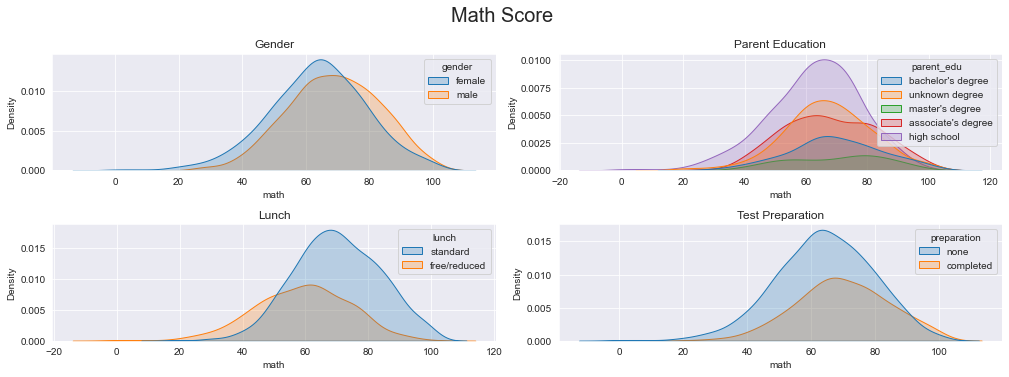

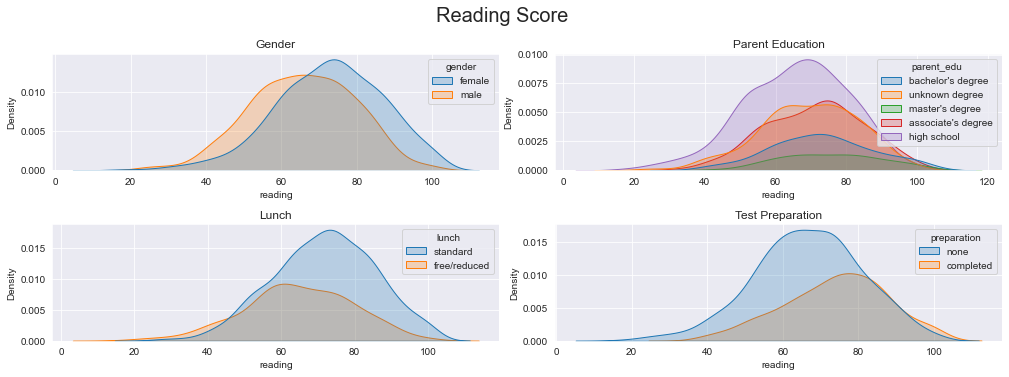

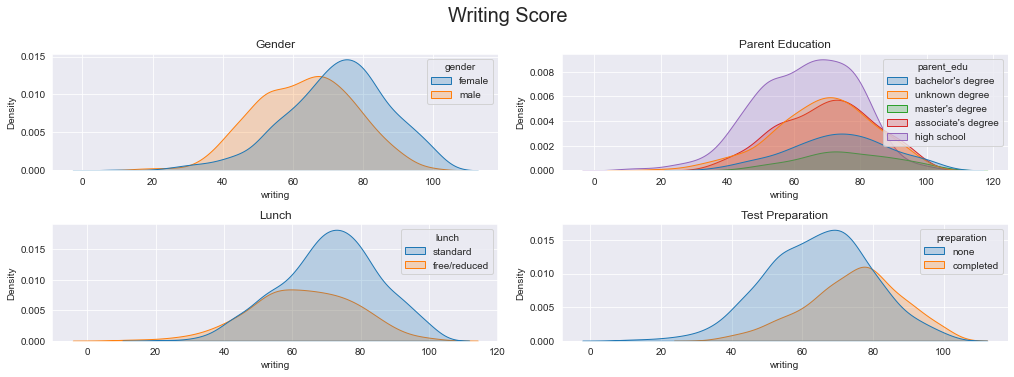

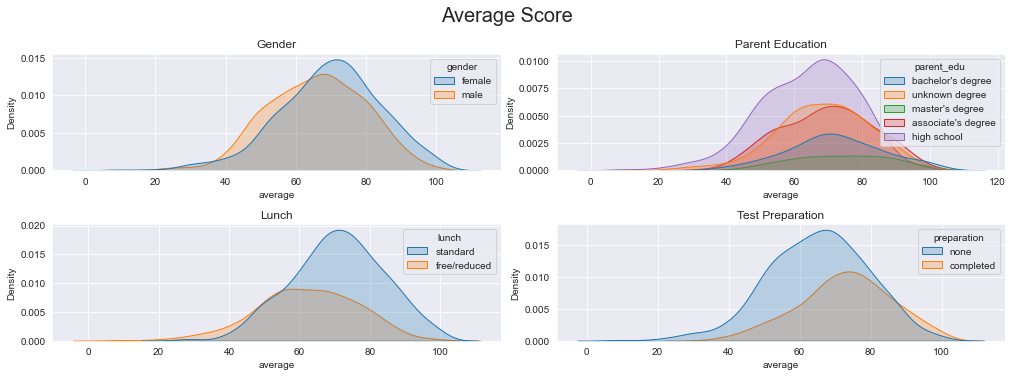

In [19]:
# set chart axes's size 
""" https://stackoverflow.com/questions/44970010/axes-class-set-explicitly-size-width-height-of-axes-in-given-units """
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

# score distribution according to independent feature
def score_dist(score):

    fig, axs = plt.subplots(2,2, figsize=(15,8))
    ax0 = fig.add_subplot(axs[0,0])
    ax1 = fig.add_subplot(axs[0,1])
    ax2 = fig.add_subplot(axs[1,0])
    ax3 = fig.add_subplot(axs[1,1])
    
    sns.kdeplot(data=data, x=data[score], hue=data['gender'], ax=ax0, fill=True)
    sns.kdeplot(data=data, x=data[score], hue=data['parent_edu'], ax=ax1, fill=True)
    sns.kdeplot(data=data, x=data[score], hue=data['lunch'], ax=ax2, fill=True)
    sns.kdeplot(data=data, x=data[score], hue=data['preparation'], ax=ax3, fill=True)
    
    plt.suptitle(f"{score.capitalize()} Score",fontsize=20)
    ax0.set_title('Gender')
    ax1.set_title('Parent Education')
    ax2.set_title('Lunch')
    ax3.set_title('Test Preparation')
    
#     plt.legend(fontsize=5, title_fontsize=8)
    set_size(11,4)
    plt.tight_layout()
    plt.show()
    
score_dist('math')
score_dist('reading')
score_dist('writing')
score_dist('average')

- Reading, writing, and average scores are dominated by female students
- Lunch before exam can increase the change to gain high score in exam
- Parent Education has next to no impact to score
- Preparation before exam can increase the change to gain high score